# Importing libraries and data file

In [48]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
#renamed data file to avoid errors
df = pd.read_excel("Datasheet23.xlsx")

# Basic Statistics

In [129]:
#calculating missing data percentage
percentage = df.isnull().sum()*100/len(df)

#storing and presenting data
df2 = pd.DataFrame({'Column':df.columns,
                    'Percentage_missing':percentage})
df2.index = np.arange(0,len(df2))
# print(df2.tail())

In [180]:
#basic statistics
#slicing rainfall data into temporary df
tdf = df.iloc[:,3:27]

#calculating and presenting data
df3 = pd.DataFrame({'Mean':tdf.mean(),'Variance':tdf.var(),
                    'Standard Deviation':tdf.std(),'Skewness':tdf.skew()})
#dry probability of 35 years
# print(len(df[df['daily'] < 0.2])/len(df))
# print(df3)

# Time Series

In [5]:
#summing 24 hour data
df['daily']= df[df.columns[3:28]].sum(axis=1)

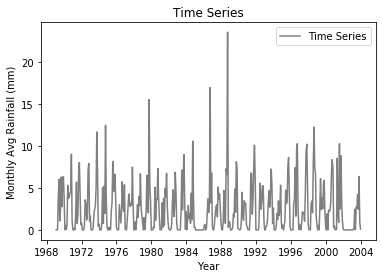

In [181]:
#calculating monthly rainfall
m_rain = list()
mx_rain = list()
for i in range(35):
    for j in range(12):
        data = df[(df['year']==1969+i) & (df['month']==j+1)]
        m_rain.append(data['daily'].mean())
        mx_rain.append(data['daily'].max())

#generating time data for 35*12 months
dt = pd.date_range('1969-01',periods=420,freq="M")

#creating monthly rainfall df
mrdf = pd.DataFrame({'Year':dt,'Avg Monthly Rainfall':m_rain,
                     'Max Rainfall':mx_rain})

#visualizing the data
#monthly maximum rainfall
# print(mrdf.head())
#time series
plt.plot(mrdf['Year'],mrdf['Avg Monthly Rainfall'],
         label='Time Series',color='grey')
plt.xlabel('Year')
plt.ylabel('Monthly Avg Rainfall (mm)')
plt.title('Time Series')
plt.legend()
plt.show()

# Three hours aggregate

In [183]:
#generating datetime
ndt = pd.date_range('1969-01',periods=12783,freq="D")

#generating data
df_3 = pd.DataFrame({'Date':ndt,
                    'HRF 1-3':tdf[tdf.columns[0:3]].sum(axis=1),
                    'HRF 4-6':tdf[tdf.columns[3:6]].sum(axis=1),
                    'HRF 7-9':tdf[tdf.columns[6:9]].sum(axis=1),
                    'HRF 10-12':tdf[tdf.columns[9:12]].sum(axis=1),
                    'HRF 13-15':tdf[tdf.columns[12:15]].sum(axis=1),
                    'HRF 16-18':tdf[tdf.columns[15:18]].sum(axis=1),
                    'HRF 19-21':tdf[tdf.columns[18:21]].sum(axis=1),
                    'HRF 22-24':tdf[tdf.columns[21:24]].sum(axis=1)
                   })
df_3s = pd.DataFrame({
                    'Mean':df_3.iloc[:,1:].mean(),'Variance':df_3.iloc[:,1:].var(),
                    'Standard Deviation':df_3.iloc[:,1:].std(),
                    'Skewness':df_3.iloc[:,1:].skew()
                     })

# print(df_3s.head())

# Six hours aggregate

In [153]:
df_6 = pd.DataFrame({'Date': ndt,
                    'HRF 1-6':df_3[df_3.columns[1:3]].sum(axis=1),
                    'HRF 7-12':df_3[df_3.columns[3:5]].sum(axis=1),
                    'HRF 13-18':df_3[df_3.columns[5:7]].sum(axis=1),
                    'HRF 19-24':df_3[df_3.columns[7:9]].sum(axis=1)
                    })
df_6s = pd.DataFrame({
                    'Mean':df_6.iloc[:,1:].mean(),'Variance':df_6.iloc[:,1:].var(),
                    'Standard Deviation':df_6.iloc[:,1:].std(),
                    'Skewness':df_6.iloc[:,1:].skew()
                     })
# print(df_6s.head())

# Twelve hours aggregate

In [137]:
df_12 = pd.DataFrame({'Date': ndt,
                    'HRF 1-12':df_6[df_6.columns[1:3]].sum(axis=1),
                    'HRF 13-24':df_6[df_6.columns[3:5]].sum(axis=1),
                    })
print(df_12.head())

        Date  HRF 1-12  HRF 13-24
0 1969-01-01       0.0        0.0
1 1969-01-02       0.0        0.0
2 1969-01-03       0.0        0.0
3 1969-01-04       0.0        0.0
4 1969-01-05       0.0        0.0


DatetimeIndex(['1969-01-31', '1969-02-28', '1969-03-31', '1969-04-30',
               '1969-05-31', '1969-06-30', '1969-07-31', '1969-08-31',
               '1969-09-30', '1969-10-31',
               ...
               '2003-03-31', '2003-04-30', '2003-05-31', '2003-06-30',
               '2003-07-31', '2003-08-31', '2003-09-30', '2003-10-31',
               '2003-11-30', '2003-12-31'],
              dtype='datetime64[ns]', length=420, freq='M')

# 15 days aggregate

In [184]:
t_15d = list()
for i in range(852):
    t_15d.append(df.iloc[0+15*i:15+15*i,27].sum())
days = np.arange(0,852)*15

df_15d = pd.DataFrame({'Days':days,'Total Rainfall':t_15d})
print(df_15d.head())

   Days  Total Rainfall
0     0             0.0
1    15             0.0
2    30             0.0
3    45             0.0
4    60             0.0


Year              1988.0
Annual Maximum     432.8
Name: 19, dtype: float64


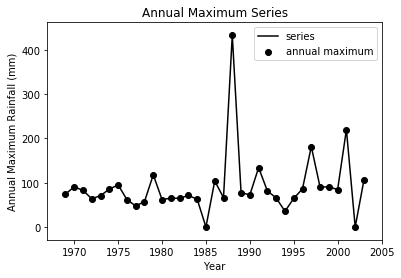

In [220]:
an_mx = list()
for i in range(35):
    an_mx.append(df[df['year']==1969+i].iloc[:,27].max())

df_anmx = pd.DataFrame({'Year':np.arange(35)+1969,'Annual Maximum':an_mx})

#printing highest rainfall

print(df_anmx.loc[df_anmx.iloc[:,1].idxmax()])

#plotting annual maximum series
plt.plot(df_anmx['Year'],df_anmx['Annual Maximum'],color='black',label='series')
plt.scatter(df_anmx['Year'],df_anmx['Annual Maximum'],color='black',label='annual maximum')
plt.title('Annual Maximum Series')
plt.xlabel("Year")
plt.ylabel("Annual Maximum Rainfall (mm)")
plt.legend()
plt.show()